In [1]:
import yfinance as yf

# Create the ticker object
tesla = yf.Ticker("TSLA")

# Get stock history
tesla_data = tesla.history(period="max")

# Reset index and display first 5 rows
tesla_data.reset_index(inplace=True)
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Pretend to be a browser using headers
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115 Safari/537.36"
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Find all tables
tables = soup.find_all("table")

# Locate the revenue table
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        revenue_table = table
        break

# Extract rows from the revenue table
dates = []
revenues = []

for row in revenue_table.tbody.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue:
            dates.append(date)
            revenues.append(revenue)

# Create the DataFrame
tesla_revenue = pd.DataFrame({
    "Date": dates,
    "Revenue": revenues
})

# Show last 5 rows
print(tesla_revenue.tail())


          Date Revenue
59  2010-09-30      31
60  2010-06-30      28
61  2010-03-31      21
62  2009-09-30      46
63  2009-06-30      27


In [3]:
# Import yfinance
import yfinance as yf

# Create the ticker object for GameStop
gme = yf.Ticker("GME")

# Get stock history
gme_data = gme.history(period="max")

# Reset index and display first 5 rows
gme_data.reset_index(inplace=True)
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578048  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL for GameStop revenue on Macrotrends
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Use headers to avoid 403 error
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115 Safari/537.36"
}

# Request the page content
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Find all tables on the page
tables = soup.find_all("table")

# Locate the revenue table
for table in tables:
    if "GameStop Quarterly Revenue" in table.text:
        revenue_table = table
        break

# Extract data from the table
dates = []
revenues = []

for row in revenue_table.tbody.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue:
            dates.append(date)
            revenues.append(revenue)

# Create the DataFrame
gme_revenue = pd.DataFrame({
    "Date": dates,
    "Revenue": revenues
})

# Display last five rows
print(gme_revenue.tail())

          Date Revenue
61  2010-01-31    3524
62  2009-10-31    1835
63  2009-07-31    1739
64  2009-04-30    1981
65  2009-01-31    3492


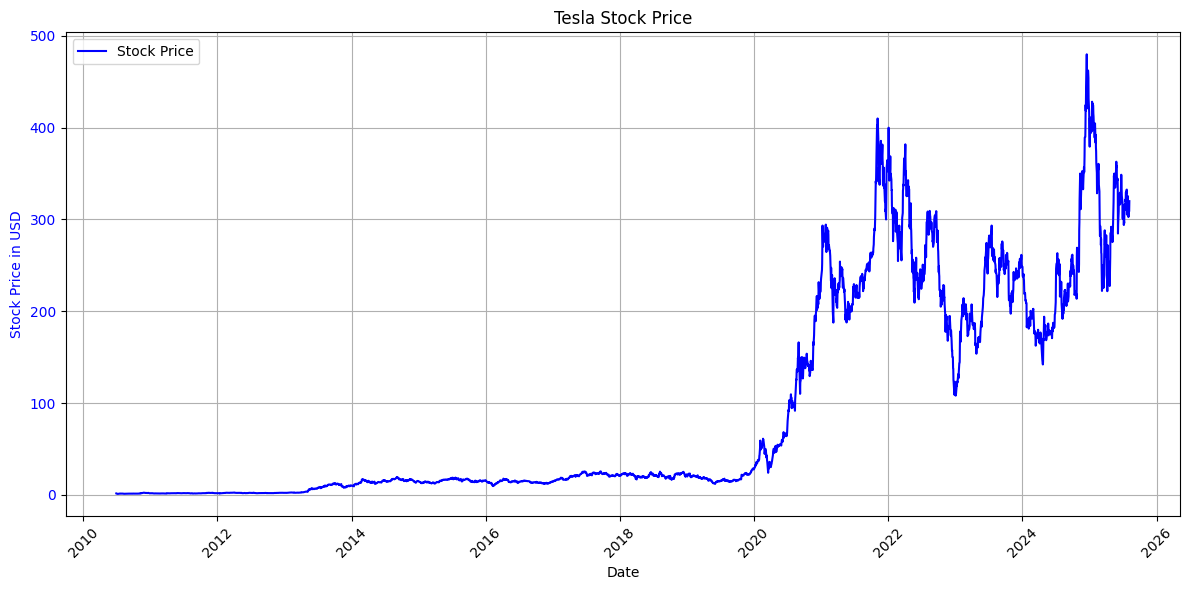

In [5]:
import matplotlib.pyplot as plt

# Function to plot stock data
def make_graph(stock_data, revenue_data, stock_name):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plotting stock data
    ax1.plot(stock_data['Date'], stock_data['Close'], color='blue', label='Stock Price')
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price in USD", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title(f"{stock_name} Stock Price")

    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Resetting index to get 'Date' as a column
tesla_data.reset_index(inplace=True)

# Call the function
make_graph(tesla_data, tesla_revenue, "Tesla")

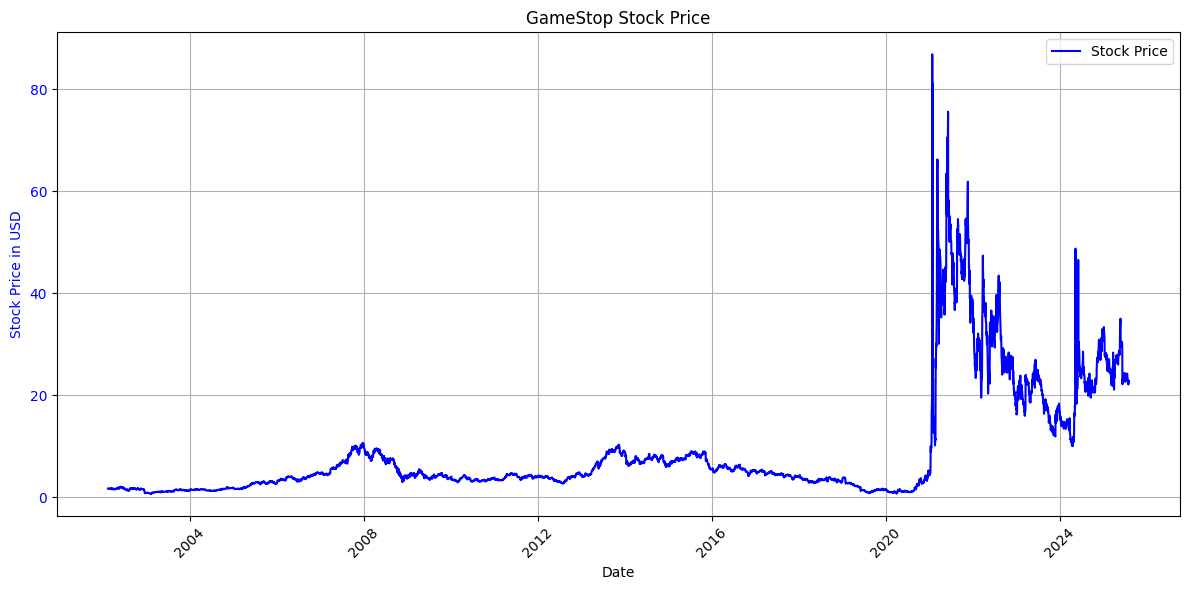

In [6]:
# Ensure index is reset to access the 'Date' column
gme_data.reset_index(inplace=True)

# Reuse the same make_graph function
make_graph(gme_data, gme_revenue, "GameStop")